<a href="https://colab.research.google.com/github/ArseniyKoz/uni.ml/blob/t2p/practice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('abalone21.csv')
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,NaN,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,M,NaN,0.365,0.125,0.5160,0.2155,0.1140,0.155,NaN
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [ ]:
data = data.dropna()
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8.0
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20.0


In [ ]:
X = data.iloc[:, 0:4]
X.head()

,Sex,Length,Diameter,Height
0,M,0.455,0.365,0.095
1,M,0.350,0.265,0.090
4,I,0.330,0.255,0.080
5,I,0.425,0.300,0.095
6,F,0.530,0.415,0.150


In [ ]:
X['Sex'] = X['Sex'].replace(['M', 'I', 'F'], [1, 0, -1])
data_types_dict = {'Sex': int}
X.head()
#X.dtypes

Sex           int64
Length      float64
Diameter    float64
Height      float64
dtype: object

In [ ]:
y = data.iloc[:, [8]]
y.head()

,Rings
0,15.0
1,7.0
4,7.0
5,8.0
6,20.0


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state = 241)
clf.fit(X,y)

DecisionTreeRegressor(random_state=241)

In [ ]:
importances = clf.feature_importances_
print(importances)

[0.05746596 0.23967125 0.25579845 0.44706435]


In [ ]:
clf.feature_names_in_

array(['Sex', 'Length', 'Diameter', 'Height'], dtype=object)

In [ ]:
#print(X.columns.values[np.argsort(importances)[:1:-1]])
ans = np.argsort(importances)[::-1]
print("Два признака с наибольшей важностью:")
print(X.columns[ans[0]], " = ", importances[ans[0]])
print(X.columns[ans[1]], " = ", importances[ans[1]])

Два признака с наибольшей важностью:
Height  =  0.4470643534277845
Diameter  =  0.2557984456498451


<BarContainer object of 4 artists>

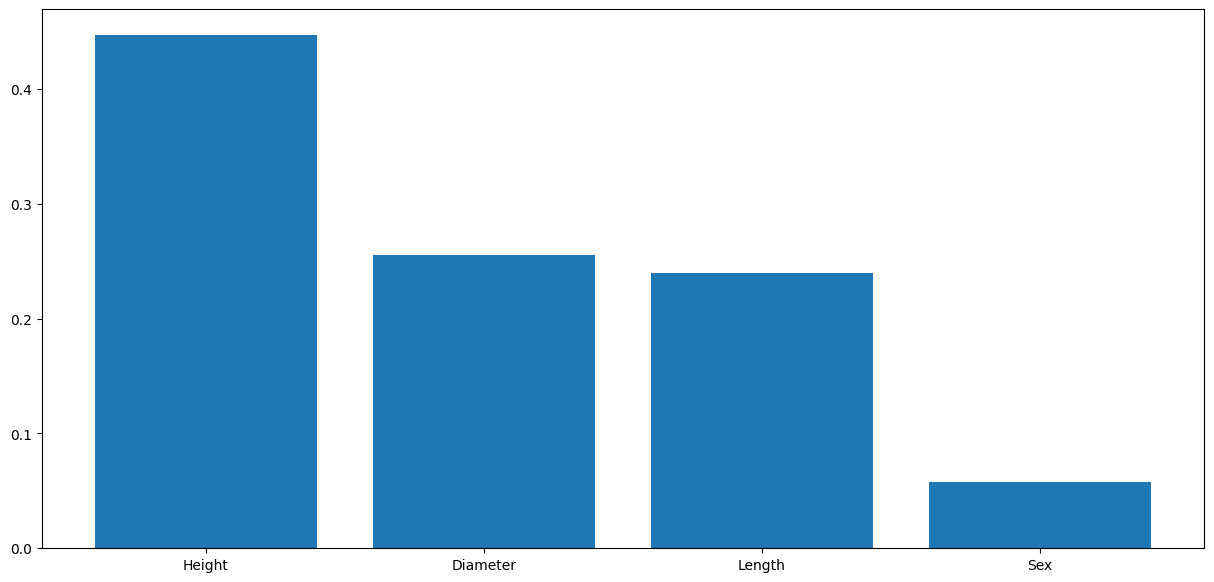

In [ ]:
import matplotlib.pyplot as plt

idx = np.argsort(clf.feature_importances_)[::-1]
plt.figure(figsize = (15, 7))
plt.bar(clf.feature_names_in_[idx], clf.feature_importances_[idx])

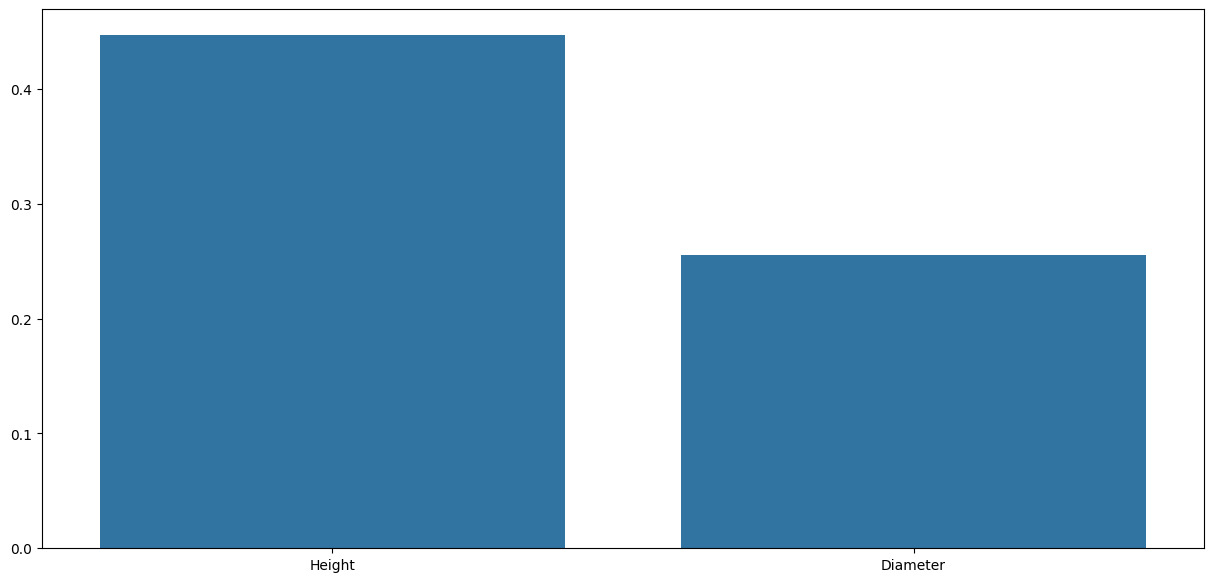

In [ ]:
import seaborn as sns
n = 2
plt.figure(figsize = (15, 7))
fig = sns.barplot(y = clf.feature_importances_[idx][:n], x = clf.feature_names_in_[idx][:n])

In [ ]:
X.corr()

,Sex,Length,Diameter,Height
Sex,1.000000,-0.035873,-0.038733,-0.042030
Length,-0.035873,1.000000,0.986820,0.827559
Diameter,-0.038733,0.986820,1.000000,0.833684
Height,-0.042030,0.827559,0.833684,1.000000


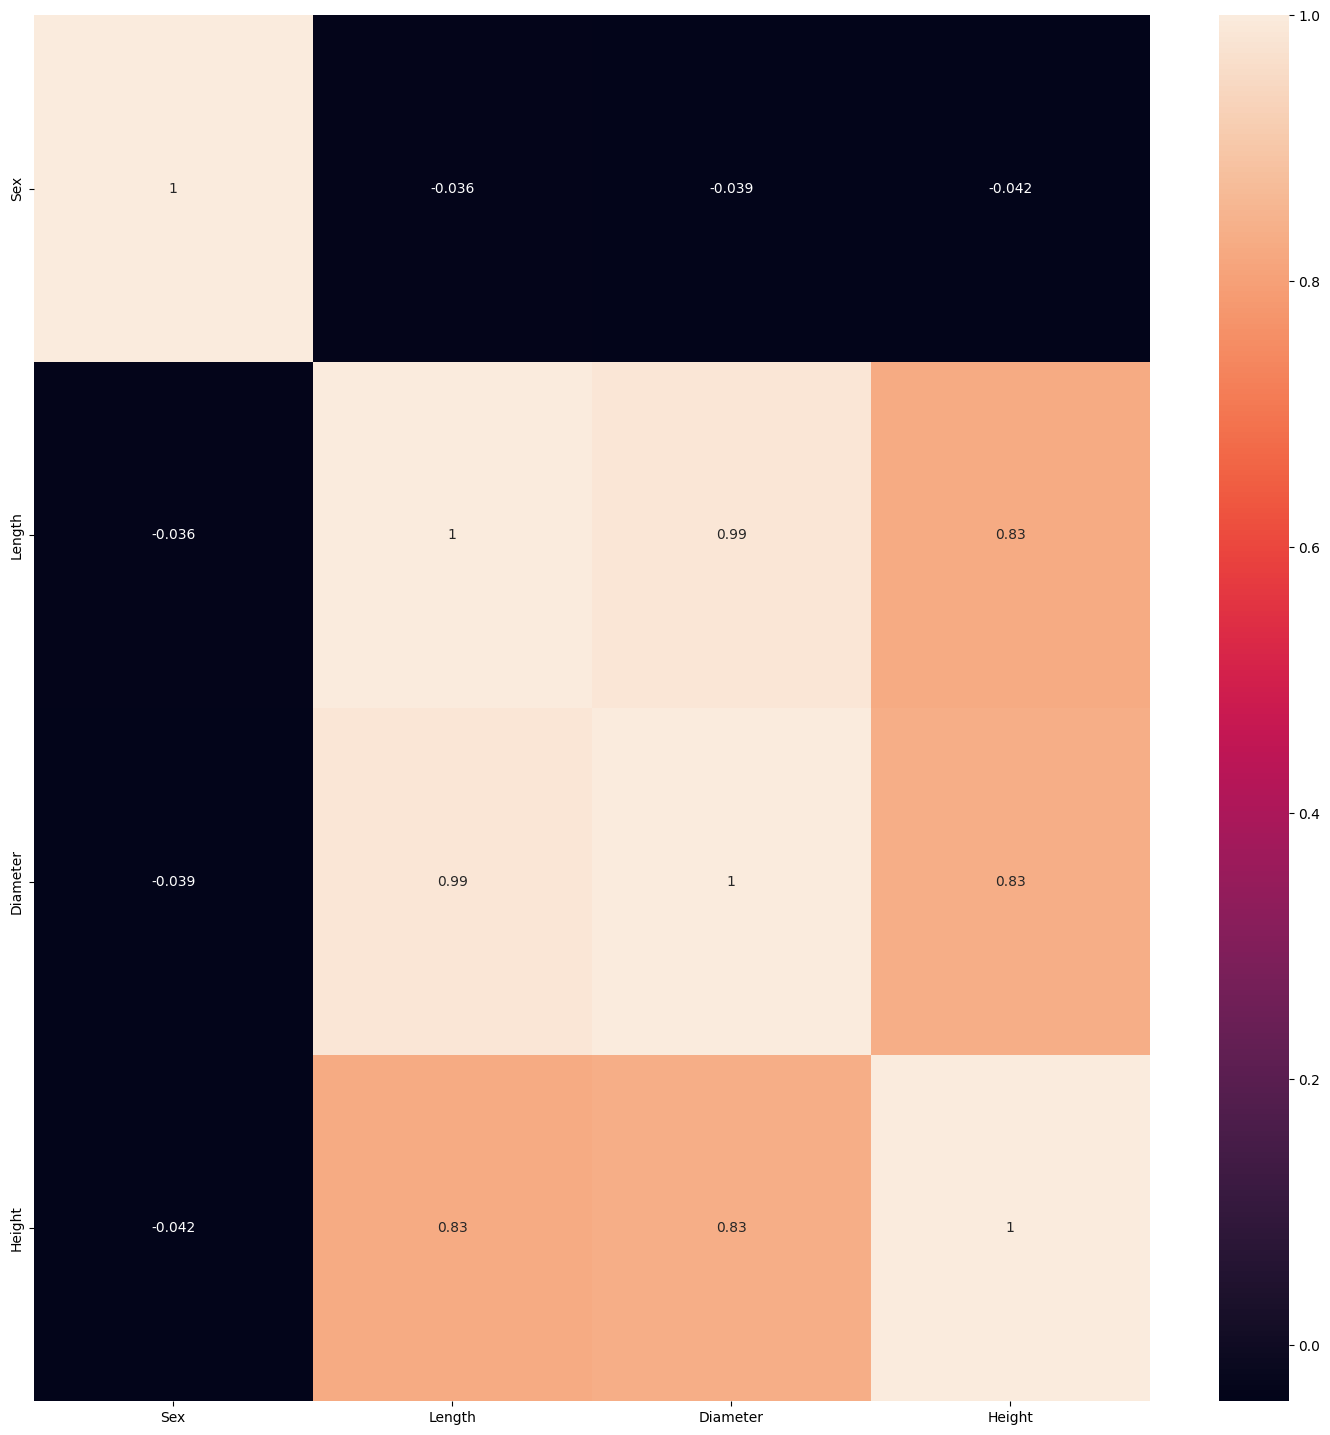

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True,ax=ax)
plt.show()